# Project: Communicate Data Findings with Ford GoBike System Data

Haoming Jin

## Data Gathering
First let's import the libraries and read in the data from this webpage:
https://s3.amazonaws.com/baywheels-data/index.html

In [204]:
from io import BytesIO
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [205]:
#filelist = ['2017','201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
#            '201901','201902','201903','201904']
filelist = ['201905','201906','201907','201908','201909','201910','201911','201912',
           '202001','202002']

In [206]:
df = pd.DataFrame()
for file in filelist:
    try:
        if (int(file) < 201905): ending = '-fordgobike-tripdata.csv'
        else: ending = '-baywheels-tripdata.csv'
        url = "https://s3.amazonaws.com/baywheels-data/"+ file + ending + ".zip"
        resp = urlopen(url)
        zipfile = ZipFile(BytesIO(resp.read()))
        zipfile.namelist()
        df_temp = pd.read_csv(zipfile.open(file + ending))
        df = df.append(df_temp.iloc[:,:13])
        print(file, 'complete', end = ' ')
    except:
        print(file, 'fail')

201905 complete 

C:\Users\Kami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201906 complete 

C:\Users\Kami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201907 complete 201908 complete 201909 complete 201910 complete 201911 complete 

C:\Users\Kami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201912 complete 202001 complete 202002 complete 

This take quite a while to read in!

At first I tried to import all the data into a DataFrame. However, upon inspection, I noticed that on May 2019, not only does is an extra row with inconsistant name (for the two files I checked one has 'bike_share_for_all_trip' as colunm 13, the other has 'rental_access_method') is added, also there are many more rows with missing starting station id, sometimes up to 50% of the data. Clearly there is a drastic change in data management at that time. We will first only look at data in the period of Jan 2017 - May 2019

In [207]:
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364287 entries, 0 to 432353
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 252.5+ MB
None


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
70596,1001,2019-08-21 18:11:35.0480,2019-08-21 18:28:17.0020,280.0,San Fernando St at 7th St,37.337122,-121.883215,296.0,5th St at Virginia St,37.325998,-121.877120,1674,Subscriber
299342,725,2020-02-24 07:33:30,2020-02-24 07:45:35,NaN,NaN,37.779832,-122.423654,NaN,NaN,37.776673,-122.395301,516395,Subscriber
58149,1194,2019-12-13 09:52:58.2930,2019-12-13 10:12:53.1140,70.0,Central Ave at Fell St,37.773311,-122.444293,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1182,Customer
256637,230,2020-01-25 17:56:38,2020-01-25 18:00:29,NaN,NaN,37.789326,-122.391839,NaN,NaN,37.787391,-122.396154,903093,Subscriber
75079,584,2020-01-10 09:03:02.8090,2020-01-10 09:12:47.1320,152.0,47th St at San Pablo Ave,37.835632,-122.281051,176.0,MacArthur BART Station,37.828410,-122.266315,1770,Customer


In [208]:
df[df.isnull().any(axis = 1)].count()

duration_sec               573840
start_time                 573840
end_time                   573840
start_station_id            73637
start_station_name          74818
start_station_latitude     573840
start_station_longitude    573840
end_station_id              71588
end_station_name            72717
end_station_latitude       573840
end_station_longitude      573840
bike_id                    573840
user_type                  573840
dtype: int64

Let's save the data so we can easily reload it.



In [209]:
df.to_csv('201905-202002-bike.csv',index = False)

# Data Cleaing
**Reload From Here**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('201701-201905-bike.csv')
df2 = pd.read_csv('201905-202002-bike.csv')
df = df.append(df2)

There are several issues with this dataset:
1. start time and end time is in string format, they should be in datetime format.
2. station ids are float, they should be string type instead of float, and we should also remove the trailing .0
3. bike id is integer, it should be string.
4. 12501 entries with missing start_station and end_station informations, considering the high number of data, we won't remove it now.
5. user type should be category data.
6. some longitude and latitude data are 0 or clearly out of range (not in San Francisco).

In [13]:
df.start_time = pd.to_datetime(df.start_time)

In [14]:
df.end_time = pd.to_datetime(df.end_time)

In [15]:
df.start_station_id = df.start_station_id.astype(str).str.replace('.0','',regex = False)
df[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']].loc[df.start_station_id == ''] = None
df.end_station_id = df.end_station_id.astype(str).str.replace('.0','',regex = False)
df[['end_station_id','end_station_name','end_station_latitude','end_station_longitude']].loc[df.end_station_id == ''] = None

In [16]:
df.bike_id = df.bike_id.astype(str)

In [17]:
df.user_type.value_counts()

Subscriber    4462384
Customer      1156228
Name: user_type, dtype: int64

In [18]:
user_classes = pd.api.types.CategoricalDtype(ordered = True, categories = ['Customer','Subscriber'])
df.user_type = df.user_type.astype(user_classes)

In [19]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5618612 entries, 0 to 2364286
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             5618612 non-null  int64         
 1   start_time               5618612 non-null  datetime64[ns]
 2   end_time                 5618612 non-null  datetime64[ns]
 3   start_station_id         5618612 non-null  object        
 4   start_station_name       5107089 non-null  object        
 5   start_station_latitude   5618612 non-null  float64       
 6   start_station_longitude  5618612 non-null  float64       
 7   end_station_id           5618612 non-null  object        
 8   end_station_name         5104988 non-null  object        
 9   end_station_latitude     5618612 non-null  float64       
 10  end_station_longitude    5618612 non-null  float64       
 11  bike_id                  5618612 non-null  object        
 12  

In [20]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,5.618612e+06,5.618612e+06,5.618612e+06,5.618612e+06,5.618612e+06
mean,8.492320e+02,3.776451e+01,-1.223524e+02,3.776416e+01,-1.223502e+02
std,2.252493e+03,1.423600e-01,3.411675e-01,1.982004e-01,5.622161e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225758e+02
25%,3.590000e+02,3.777003e+01,-1.224133e+02,3.777027e+01,-1.224117e+02
50%,5.710000e+02,3.778076e+01,-1.223988e+02,3.778095e+01,-1.223984e+02
75%,8.910000e+02,3.779539e+01,-1.223881e+02,3.779539e+01,-1.223881e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


Some of the latitude and longitude are 0, which makes no sense! Do you know the intercept of 0 latitude and 0 longitude is somewhere in the Atlantic Ocean? I suppose there is no bike stations in the Ocean.

In [21]:
df[df.start_station_latitude == 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
3055894,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.775880,-122.393170,1161,Subscriber
1484567,639,2019-11-23 13:46:07.000,2019-11-23 13:56:47.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766031,-122.396266,684860,Subscriber
1484568,109,2019-11-23 13:31:26.000,2019-11-23 13:33:16.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766062,-122.396172,713264,Subscriber
1484569,116,2019-11-23 13:57:59.000,2019-11-23 13:59:56.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766085,-122.396163,624522,Subscriber
1484570,95,2019-11-23 14:11:33.000,2019-11-23 14:13:08.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.765984,-122.396230,481459,Subscriber
1484571,75,2019-11-23 14:00:40.000,2019-11-23 14:01:56.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766090,-122.396222,839240,Subscriber
1484572,83,2019-11-23 13:39:34.000,2019-11-23 13:40:58.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766119,-122.396180,588578,Subscriber
1484573,92,2019-11-23 13:20:35.000,2019-11-23 13:22:08.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766063,-122.396153,561068,Subscriber
1484574,82,2019-11-23 14:06:29.000,2019-11-23 14:07:52.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766118,-122.396238,965131,Subscriber
1484575,80,2019-11-23 14:09:59.000,2019-11-23 14:11:19.000,449,16th Depot Bike Fleet Station,0.0,0.0,nan,NaN,37.766055,-122.396220,767594,Subscriber


In [22]:
df[df.end_station_id == '420']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
3016391,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,1612,Subscriber
3017157,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,3507,Subscriber
3017311,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,1142,Subscriber
3017390,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,3500,Subscriber
3017843,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,1181,Subscriber
3017926,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,2535,Subscriber
3017958,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,462,Subscriber
3018249,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,1880,Customer
3030500,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,150,Customer
3030553,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,311,Subscriber


All the data comes from this "SF Test Station". We don't know what it means, but the amount of data is too small to be of concern. Let's drop them.

In [23]:
df = df[(df.start_station_id != '420') & (df.end_station_id != '420')]

In [24]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,5.618592e+06,5.618592e+06,5.618592e+06,5.618592e+06,5.618592e+06
mean,8.492316e+02,3.776452e+01,-1.223524e+02,3.776429e+01,-1.223506e+02
std,2.252496e+03,1.414660e-01,3.372406e-01,1.856364e-01,5.152343e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225758e+02
25%,3.590000e+02,3.777003e+01,-1.224133e+02,3.777027e+01,-1.224117e+02
50%,5.710000e+02,3.778076e+01,-1.223988e+02,3.778095e+01,-1.223984e+02
75%,8.910000e+02,3.779539e+01,-1.223881e+02,3.779539e+01,-1.223881e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


So this data is supposed to be bike rental in SF, so the latitude and longitude shouldn't be too far away. The maximun number seems odd.

In [25]:
df[df.start_station_latitude > 38]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
1153196,283,2018-06-29 08:57:14.525,2018-06-29 09:01:57.582,nan,NaN,45.510000,-73.570000,nan,NaN,45.510000,-73.570000,4295,Subscriber
1174814,12944,2018-06-26 10:59:12.446,2018-06-26 14:34:57.186,nan,NaN,44.950000,-93.220000,nan,NaN,44.950000,-93.220000,3758,Subscriber
1199788,1443,2018-06-22 13:36:13.056,2018-06-22 14:00:16.996,nan,NaN,45.510000,-73.570000,nan,NaN,45.510000,-73.570000,4295,Subscriber
1277552,191,2018-06-11 08:23:37.019,2018-06-11 08:26:48.599,nan,NaN,45.510000,-73.570000,nan,NaN,45.510000,-73.570000,4295,Subscriber
1335753,69,2018-06-01 13:56:04.027,2018-06-01 13:57:13.648,nan,NaN,40.660000,-74.010000,nan,NaN,40.660000,-74.010000,4297,Subscriber
1335770,126,2018-06-01 13:51:52.771,2018-06-01 13:53:58.967,nan,NaN,40.660000,-74.010000,nan,NaN,40.660000,-74.010000,4297,Subscriber
1335791,67,2018-06-01 13:47:53.131,2018-06-01 13:49:00.368,nan,NaN,40.660000,-74.010000,nan,NaN,40.660000,-74.010000,4297,Subscriber
1604948,501,2018-08-21 12:11:52.500,2018-08-21 12:20:13.500,nan,NaN,45.500000,-73.570000,nan,NaN,45.510000,-73.570000,4425,Subscriber
1611788,1023,2018-08-20 12:07:06.500,2018-08-20 12:24:09.500,nan,NaN,45.500000,-73.570000,nan,NaN,45.510000,-73.570000,4425,Subscriber
1612386,94,2018-08-20 09:53:14.500,2018-08-20 09:54:48.500,nan,NaN,45.510000,-73.570000,nan,NaN,45.510000,-73.570000,4425,Subscriber


With the google map you can see these places are in Minnesota and Canada, etc. Let's drop them.

In [26]:
df = df[df.start_station_latitude < 38]

In [27]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,5.618575e+06,5.618575e+06,5.618575e+06,5.618575e+06,5.618575e+06
mean,8.492288e+02,3.776450e+01,-1.223526e+02,3.776427e+01,-1.223507e+02
std,2.252493e+03,1.410018e-01,3.273436e-01,1.852828e-01,5.088123e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225758e+02
25%,3.590000e+02,3.777003e+01,-1.224133e+02,3.777027e+01,-1.224117e+02
50%,5.710000e+02,3.778076e+01,-1.223988e+02,3.778095e+01,-1.223984e+02
75%,8.910000e+02,3.779539e+01,-1.223881e+02,3.779539e+01,-1.223881e+02
max,9.121100e+05,3.789530e+01,0.000000e+00,3.792762e+01,0.000000e+00


Let's have a look at the data with duration less than 2 minutes.

In [28]:
df[df.duration_sec < 120].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
1773251,109,2018-09-24 14:45:05.479,2018-09-24 14:46:55.409,243,Bancroft Way at College Ave,37.869360,-122.254337,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3423,Subscriber
1667713,88,2018-08-10 16:49:27.414,2018-08-10 16:50:55.927,138,Jersey St at Church St,37.750900,-122.427411,132,24th St at Chattanooga St,37.751819,-122.426614,1125,Subscriber
3198317,98,2019-04-06 19:38:55.246,2019-04-06 19:40:33.732,253,Haste St at College Ave,37.866418,-122.253799,240,Haste St at Telegraph Ave,37.866043,-122.258804,5763,Subscriber
893751,113,2018-04-18 12:06:31.465,2018-04-18 12:08:24.644,78,Folsom St at 9th St,37.773717,-122.411647,78,Folsom St at 9th St,37.773717,-122.411647,82,Customer
147078,106,2019-05-06 18:12:15.390,2019-05-06 18:14:01.809,337,Webster St at 19th St,37.806970,-122.266588,182,19th Street BART Station,37.809013,-122.268247,2236,Subscriber


Well, doing this is rather odd, but I guess people still do that.
Lastly let's check if the rent duration and start time and end time matches, also lets check if any rows have end time earlier than start time.

In [29]:
df[(df.end_time - df.start_time)/np.timedelta64(1,'s') < 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
167801,292,2017-11-05 01:59:52.216,2017-11-05 01:04:45.180,121,Mission Playground,37.759210,-122.421339,119,18th St at Noe St,37.761047,-122.432642,2773,Subscriber
2233338,475,2018-11-04 01:59:54.978,2018-11-04 01:07:50.610,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,37,2nd St at Folsom St,37.785000,-122.395936,1497,Customer
2233339,956,2018-11-04 01:51:00.396,2018-11-04 01:06:56.722,183,Telegraph Ave at 19th St,37.808702,-122.269927,149,Emeryville Town Hall,37.831275,-122.285633,417,Subscriber
2233340,878,2018-11-04 01:48:20.009,2018-11-04 01:02:58.882,59,S Van Ness Ave at Market St,37.774814,-122.418954,27,Beale St at Harrison St,37.788059,-122.391865,2331,Subscriber
2233341,226,2018-11-04 01:59:01.906,2018-11-04 01:02:48.804,41,Golden Gate Ave at Polk St,37.781270,-122.418740,61,Howard St at 8th St,37.776513,-122.411306,2136,Subscriber
2233342,586,2018-11-04 01:52:40.494,2018-11-04 01:02:27.156,375,Grove St at Masonic Ave,37.774836,-122.446546,95,Sanchez St at 15th St,37.766219,-122.431060,3144,Subscriber
2233343,170,2018-11-04 01:58:47.745,2018-11-04 01:01:38.215,132,24th St at Chattanooga St,37.751819,-122.426614,134,Valencia St at 24th St,37.752428,-122.420628,2487,Subscriber
1471207,1720,2019-11-03 01:59:09.303,2019-11-03 01:27:49.671,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,356,Valencia St at Clinton Park,37.769188,-122.422285,12293,Customer
1471222,1121,2019-11-03 01:59:37.722,2019-11-03 01:18:19.034,294,Pierce Ave at Market St,37.327581,-121.884559,300,Palm St at Willow St,37.317298,-121.884995,10968,Customer
1471230,643,2019-11-03 01:59:13.155,2019-11-03 01:09:56.715,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,130,22nd St Caltrain Station,37.757704,-122.391885,9973,Customer


In [30]:
df[np.abs((df.end_time - df.start_time)/np.timedelta64(1,'s') - df.duration_sec) > 120].shape[0]

59

These rows mostly have the hour messed up, we will remove them.

In [31]:
df = df[((df.end_time - df.start_time)/np.timedelta64(1,'s') > 0) &
        (np.abs((df.end_time - df.start_time)/np.timedelta64(1,'s') - df.duration_sec) < 120) ]

OK, we finished cleaning the data.

# Exploration

Let's see what we can do with this data. 
let's do some single variable exploration

We have a lot of data here! It takes forever to do anything! Let's take a sample of 10000 and later we can restore.

In [32]:
df_sample = df

What's the distribution of rental time?

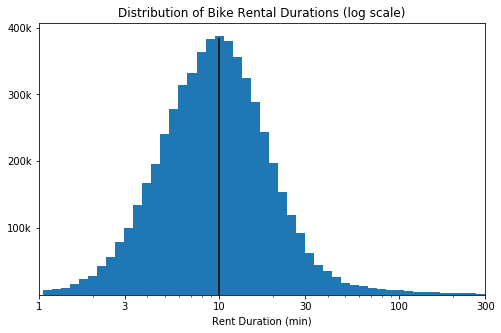

In [56]:
bins = 10 ** np.arange(0.025, np.log10(df_sample.duration_sec.max()/60) + 0.075, 0.05)
plt.figure(figsize = [8,5])
plt.hist(df_sample.duration_sec/60, bins = bins);
plt.xscale('log')
plt.xlim(1, 300);
plt.xticks([1,3,10,30,100,300],['1','3','10','30','100','300']);
plt.xlabel('Rent Duration (min)')
plt.yticks([100000,200000,300000,400000],['100k','200k','300k','400k']);
plt.title('Distribution of Bike Rental Durations (log scale)');
plt.vlines(x = 10, ymin = 0, ymax = 3.85e5)

What is the rental number compared to time?

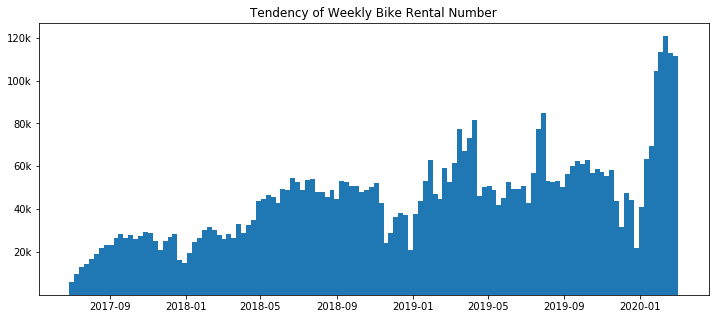

In [266]:
plt.figure(figsize = [12,5])
plt.hist(df_sample.start_time, bins = 124);
plt.yticks([2e4,4e4,6e4,8e4,1e5,1.2e5], ['20k','40k','60k','80k','100k','120k']);
plt.title('Tendency of Weekly Bike Rental Number');

Some interesting observations:
1. The tendency seem to be generally increasing, showing that the business is thriving.
2. There are a decrease in rental numbers before every January probably due to holidays.

I am curious what does it look like when I plot the position in a scatter plot.

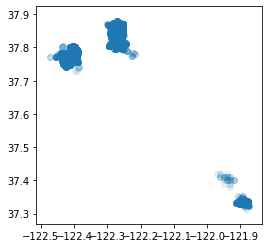

In [42]:
plt.scatter(data = df_sample, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 0.1);
plt.gca().set_aspect('equal', adjustable='box')

This is interesting, it shows us that most bike rentals happens in these areas, I bet when we overlay this with the map, it really shows something!

I an also interested in how often people travel between these four areas.

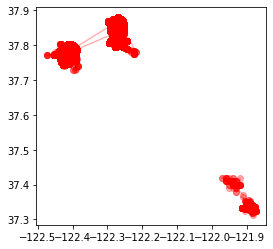

In [41]:
for i in range(len(df_sample)):
    x1 = df_sample.iloc[i].start_station_longitude
    y1 = df_sample.iloc[i].start_station_latitude
    x2 = df_sample.iloc[i].end_station_longitude
    y2 = df_sample.iloc[i].end_station_latitude
    ax = plt.plot([x1,x2],[y1,y2],'ro-', alpha = 0.3)
plt.gca().set_aspect('equal', adjustable='box')

Seems travel between areas are extremely rare.

I followed an instruction from here:

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [152]:
BBox = [-122.55,-121.8535,37.25,37.9]
north_CA_map = plt.imread('north_ca_map.png')

In [153]:
df_sample.start_time.dt.dayofweek

2371841    1
1327117    5
208130     1
2614268    5
620815     1
          ..
1676812    3
172456     4
3123343    5
1322531    0
2054781    2
Name: start_time, Length: 10000, dtype: int64

Another question one may ask is in which day of the week there is most customers, and how does weekdays compare to weekends?

([], <a list of 0 Text yticklabel objects>)

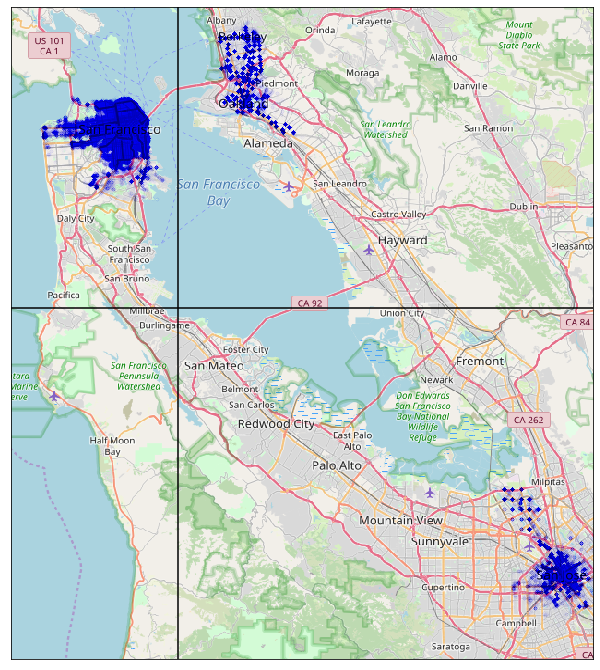

In [271]:
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df_sample.start_station_longitude, df_sample.start_station_latitude, zorder=1, alpha= 0.005, c='b', s=10);
#ax.set_title('Number of bike rentals')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(north_CA_map, zorder=0, extent = BBox, aspect= 1.2)
plt.vlines(-122.35,BBox[2],BBox[3])
plt.hlines(37.6,BBox[0],BBox[1])
plt.xticks([])
plt.yticks([])

In [126]:
df_sample = df.sample(100000)

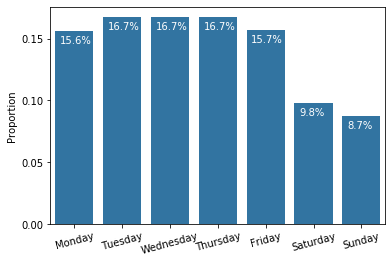

In [64]:
TOTAL = 100000
weekdaylist = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
max_prop = 18000/TOTAL
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sns.color_palette()[0]
#plt.figure(figsize=[10,8])
ax = sns.countplot(x = df_sample.start_time.dt.dayofweek, color = base_color);
plt.xticks(np.arange(0,7),weekdaylist,rotation = 15);
plt.xlabel('');
plt.yticks(tick_props * TOTAL, tick_names)
plt.ylabel('Proportion');
#Annotation
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/TOTAL)
        x = p.get_x() + 0.1
        y = p.get_height() - 1000
        ax.annotate(percentage, (x, y),color = 'w')

It seems that weekends in general has less customers and for weekdays customer numbers are roughly the same.

Another question that naturally follows up is what time of day there is most customers?

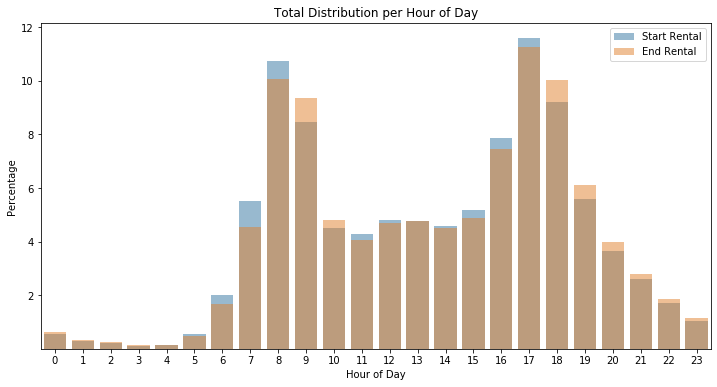

In [39]:
base_color = sns.color_palette()[0]
color2 = sns.color_palette()[1]
plt.figure(figsize = [12,6])
sns.countplot(x = df_sample.start_time.dt.hour, color = base_color, alpha = 0.5);
sns.countplot(x = df_sample.end_time.dt.hour, color = color2, alpha = 0.5);
plt.legend(['Start Rental','End Rental']);
plt.xlabel('Hour of Day');
plt.yticks([2000,4000,6000,8000,10000,12000],['2','4','6','8','10','12'])
plt.ylabel('Percentage');
plt.title('Total Distribution per Hour of Day');

We can see that rental start time peaks in the morning 8am and afternoon 5pm, that's when the commuting rush hours.

Subscriber or customer, who rents more often?

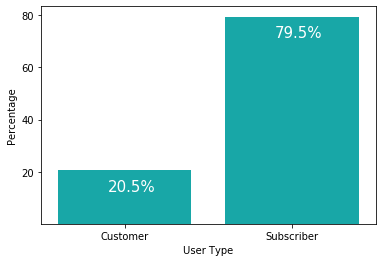

In [77]:
ax = sns.countplot(data = df_sample, x = 'user_type', color = 'c');
plt.xlabel('User Type')
plt.yticks([2e4,4e4,6e4,8e4],['20','40','60','80'])
plt.ylabel('Percentage');
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/TOTAL)
        x = p.get_x() + 0.3
        y = p.get_height() - 8000
        ax.annotate(percentage, (x, y),color = 'w',size =15)

Let's look into more details by seperating data from different areas

In [128]:
df_SF = df_sample[(df_sample.start_station_longitude < -122.35) & (df_sample.start_station_latitude > 37.6) 
                  & (df_sample.end_station_longitude < -122.35) & (df_sample.end_station_latitude > 37.6)].copy()

In [129]:
df_oakland = df_sample[(df_sample.start_station_longitude > -122.35) & (df_sample.start_station_latitude > 37.6) 
                  & (df_sample.end_station_longitude > -122.35) & (df_sample.end_station_latitude > 37.6)].copy()

In [130]:
df_sanjose = df_sample[(df_sample.start_station_longitude > -122.35) & (df_sample.start_station_latitude < 37.6) 
                  & (df_sample.end_station_longitude > -122.35) & (df_sample.end_station_latitude < 37.6)].copy()

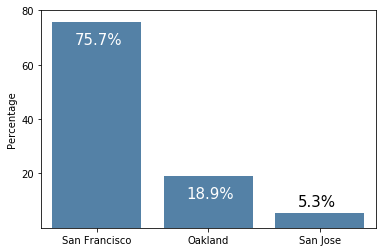

In [99]:
ax = sns.barplot(['San Francisco','Oakland','San Jose'], 
                 [df_SF.shape[0],df_oakland.shape[0], df_sanjose.shape[0]], color = 'steelblue');
plt.yticks([2e4,4e4,6e4,8e4],['20','40','60','80'])
plt.ylabel('Percentage');
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/TOTAL)
        x = p.get_x() + 0.2
        color = 'w'
        if(p.get_height() > 8000):
            y = p.get_height() - 8000
        else: 
            y = 8000 
            color = 'k'
        ax.annotate(percentage, (x, y),color = color,size =15)

In [140]:
df_SF.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,7464.000000,7464.000000,7464.000000,7464.000000,7464.000000
mean,879.900322,37.777917,-122.407257,37.778244,-122.406455
std,2330.650402,0.012883,0.013677,0.012696,0.013090
min,61.000000,37.729279,-122.473658,37.729279,-122.473658
25%,381.000000,37.770083,-122.417385,37.770407,-122.416040
50%,594.000000,37.776639,-122.403452,37.776639,-122.403234
75%,905.000000,37.788059,-122.395282,37.788059,-122.395282
max,80256.000000,37.804770,-122.385655,37.804770,-122.385655


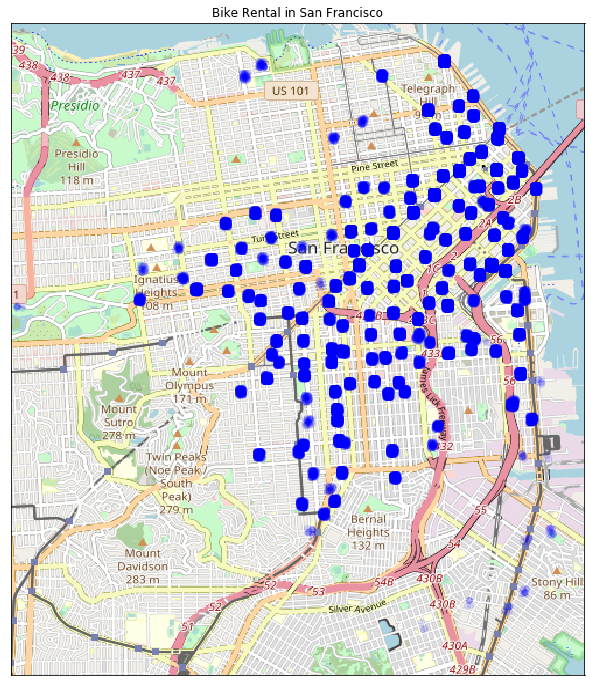

In [133]:
BBox = [-122.475,-122.38,37.72,37.81]
north_CA_map = plt.imread('SF_map.png')
fig, ax = plt.subplots(figsize = (12,12))
sns.regplot(df_SF.start_station_longitude, df_SF.start_station_latitude, fit_reg = False, 
            scatter_kws ={'alpha' : 0.1}, color='b', x_jitter = 0.0005, y_jitter = 0.0005);
ax.set_title('Bike Rental in San Francisco')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
ax.imshow(north_CA_map, zorder=0, extent = BBox, aspect= 1.2)

Bivariate Exploration

We can calculate travel length with the Haversine formula, in other words we've idealized the situation to consider the earth as a sphere and calculate the surface distance, without considering obstacles etc.

In [136]:
import math
R = 6373000
def distance(lon1,lat1,lon2,lat2):
    dlon = (lon2 - lon1)/180*np.pi
    dlat = (lat2 - lat1)/180*np.pi
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [137]:
df_SF['distance'] = df_SF.apply(lambda x: distance(x.start_station_longitude, x.start_station_latitude, 
                            x.end_station_longitude, x.end_station_latitude), axis = 1)

Text(0, 0.5, 'Travel Distance (km)')

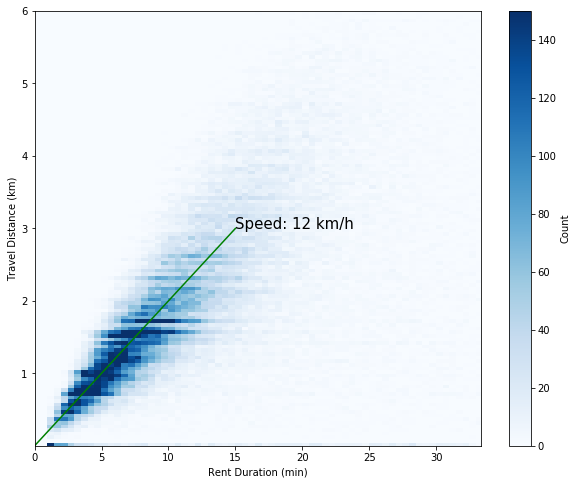

In [196]:
bins_x = np.arange(0,80030,30)
bins_y = np.arange(0,8050,50)
plt.figure(figsize = [10,8])
plt.hist2d(data = df_SF, x = 'duration_sec', y = 'distance',bins = [bins_x,bins_y],cmap = 'Blues')
plt.clim(0,150)
plt.colorbar(label = 'Count')
plt.plot([0,900],[0,3000],'g')
plt.annotate('Speed: 12 km/h', (900,3000), size = 15)
plt.xlim(0,2000)
plt.ylim(0,6000)
plt.xticks([0,300,600,900,1200,1500,1800],['0','5','10','15','20','25','30']);
plt.xlabel('Rent Duration (min)')
plt.yticks([1000,2000,3000,4000,5000,6000], ['1','2','3','4','5','6'])
plt.ylabel('Travel Distance (km)')

This plot shows us that most people who rent the bike under 30 minutes are riding at a speed ~3 m/s, while people who rented longer than that probably stored the bike somewhere.

Subscriber or customer which type rides longer?

(0, 6000)

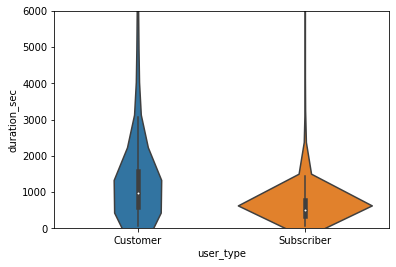

In [197]:
sns.violinplot(data = df_sample, x = 'user_type', y = 'duration_sec', showfliers = False)
plt.ylim(0,6000)

We can see in general subscribers tend to have rent duration shorter than regular customers.